In [54]:
import pandas as pd
import numpy as np
import time
from datetime import date
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

In [69]:
tweets = pd.read_csv('Tweet.csv')
company_tweet = pd.read_csv('Company_Tweet.csv')
result = pd.read_csv('result.csv')
stock = pd.read_csv('CompanyValues.csv')
reaction = pd.read_csv('reaction.csv')

TWEETS

In [8]:
tweets.head()


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1
3717963,1212160477159206912,treabase,1577836553,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0


In [9]:
tweets.tail()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1
3717963,1212160477159206912,treabase,1577836553,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0


In [13]:
print(tweets.shape)

(3717964, 7)


In [7]:
tweets.info()
print(tweets.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB
           tweet_id     post_date   comment_num   retweet_num      like_num
count  3.717964e+06  3.717964e+06  3.717964e+06  3.717964e+06  3.717964e+06
mean   8.797444e+17  1.498582e+09  3.123642e-01  6.214807e-01  2.219982e+00
std    1.924039e+17  4.587266e+07  1.966064e+00  7.009571e+00  1.429093e+01
min    5.504415e+17  1.420070e+09  0.000000e+00  0.000000e+00  0.000000e+00
25%    7.169886e+17  1.459778e+09  0.000000e+00  0.000000e+00  0.000000e+00
50%    8.743180e+17  1.497289e+09  0.000000e+00  0.000000e+00  0.000000e+00
75%    1.050771e+18  1.539358e+09  0.000000e+00  0.000000e+00  1.000000e+00
max

COMPANIES

In [10]:
companies = result['ticker_symbol'].unique()
print(companies)
company_df = pd.DataFrame({'company': companies})

['AAPL' 'AMZN' 'TSLA' 'MSFT' 'GOOG' 'GOOGL']


In [11]:
company_df.head()

,company
0,AAPL
1,AMZN
2,TSLA
3,MSFT
4,GOOG


RESULT

In [14]:
result.head()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
0,0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,Neutral
1,1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,Negative
2,2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,Negative
3,3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,Neutral
4,4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,Neutral


In [15]:
result.tail()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
4336440,4336440,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,Negative
4336441,4336441,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,Negative
4336442,4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,Neutral
4336443,4336443,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,Neutral
4336444,4336444,1212160477159206912,treabase,1577836553,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL,Neutral


In [18]:
print(result.shape)

(4336445, 10)


In [19]:
result.describe()

,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num
count,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06
mean,2.168222e+06,8.834282e+17,1.499461e+09,2.923863e-01,6.347647e-01,2.103625e+00
std,1.251824e+06,1.927735e+17,4.596080e+07,1.885788e+00,6.986371e+00,1.371744e+01
min,0.000000e+00,5.504415e+17,1.420070e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.084111e+06,7.185450e+17,1.460149e+09,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.168222e+06,8.825934e+17,1.499262e+09,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.252333e+06,1.054776e+18,1.540313e+09,0.000000e+00,0.000000e+00,1.000000e+00
max,4.336444e+06,1.212160e+18,1.577837e+09,6.310000e+02,9.990000e+02,9.990000e+02


In [20]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   tweet_id       int64 
 2   writer         object
 3   post_date      int64 
 4   body           object
 5   comment_num    int64 
 6   retweet_num    int64 
 7   like_num       int64 
 8   ticker_symbol  object
 9   reaction       object
dtypes: int64(6), object(4)
memory usage: 330.8+ MB


In [21]:
result = result.replace('Negative', -1)
result = result.replace('Neutral', 0)
result = result.replace('Positive', 1)

In [22]:
result.head()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
0,0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0
1,1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1
2,2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1
3,3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0
4,4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0


In [23]:
dates = []
def toDate(num):
    temp = datetime.fromtimestamp(int(num))
    dates.append(temp)


In [24]:
for date in result['post_date']:
    toDate(date)

In [25]:
result['date'] = dates

In [62]:
result['date'] = pd.to_datetime(result['date']).dt.date

In [63]:
result.head()

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01
1,550441672312512512,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01
2,550441732014223360,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01
3,550442977802207232,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01
4,550443807834402816,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01


In [27]:
result.drop(['post_date'], axis=1)
result = result.drop(['Unnamed: 0'], axis=1)

In [28]:
result.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01 00:00:57
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01 00:01:36
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01 00:01:50
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01 00:06:47
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01 00:10:05


In [30]:
result.isnull().values.any()


True

In [31]:
result.isnull().sum().sum()

55919

<AxesSubplot: >

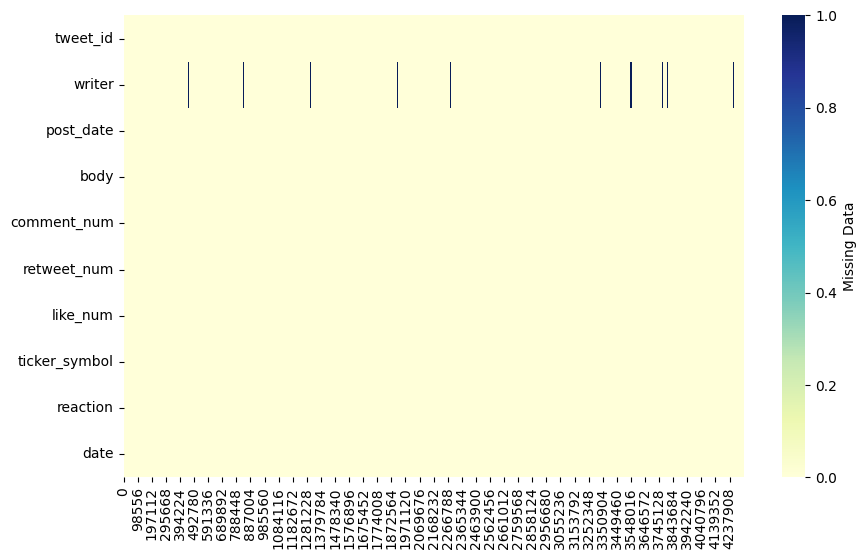

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(result.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title="Missing Data")

In [33]:
result['writer'] = result['writer'].fillna("Unknown Author")

In [34]:
result['writer'].isnull().values.any()

False

[Text(0.5, 1.0, 'Missing Data')]

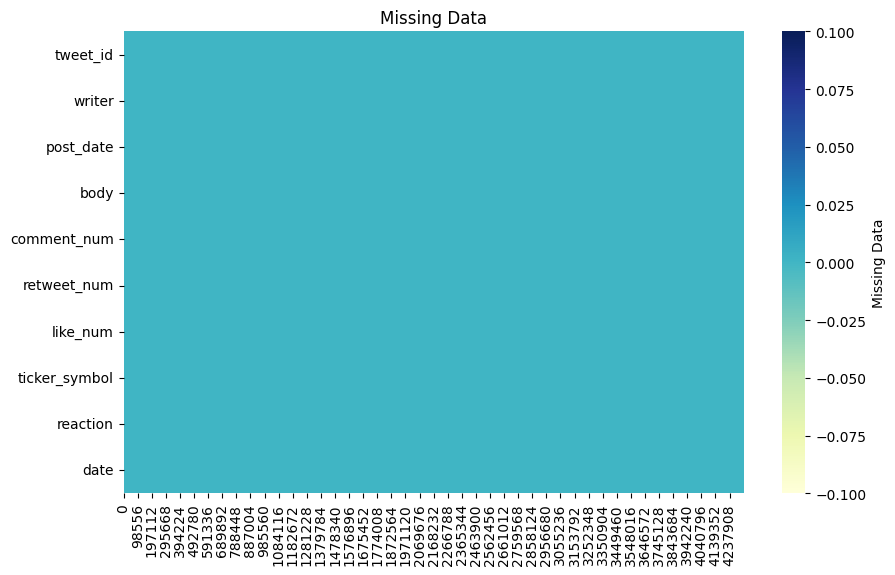

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(result.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}).set(title='Missing Data')

NUMBER OF TWEETS RELATING TO EACH COMPANY

In [36]:
num_tweets_company = result.groupby(result['ticker_symbol'].tolist(), as_index=False).size()

In [38]:
num_tweets_company.head()

,index,size
0,AAPL,1425013
1,AMZN,718715
2,GOOG,392569
3,GOOGL,327569
4,MSFT,375711


Text(0.5, 1.0, 'Number of tweets releated to companies')

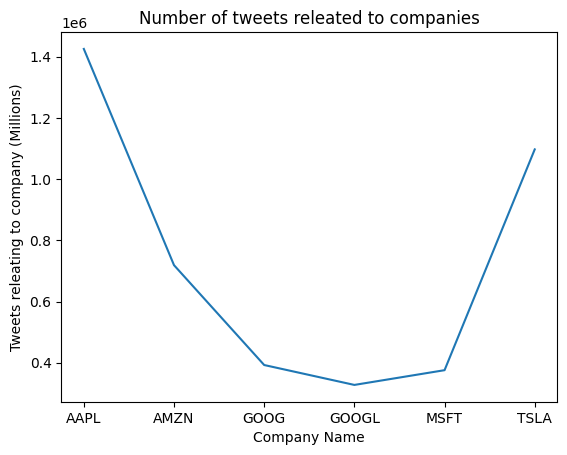

In [55]:
plt.plot( num_tweets_company['index'], num_tweets_company['size'])
plt.ylabel('Tweets releating to company (Millions)')
plt.xlabel('Company Name')
plt.title('Number of tweets releated to companies')

In [58]:
company_tweet_likes = []
company_tweet_retweet = []
for name in companies:
    
    company_tweet_likes.append(result.loc[result['ticker_symbol'] == name, 'like_num'].sum())
    company_tweet_retweet.append(result.loc[result['ticker_symbol'] == name, 'retweet_num'].sum())
print('Likes per company',company_tweet_likes)
print('Retweets per company',company_tweet_retweet)

Likes per company [1378670, 984166, 5769051, 347520, 235928, 406917]
Retweets per company [722396, 419783, 1078386, 193364, 147143, 191550]


Text(0, 0.5, 'Number of likes (Millions)')

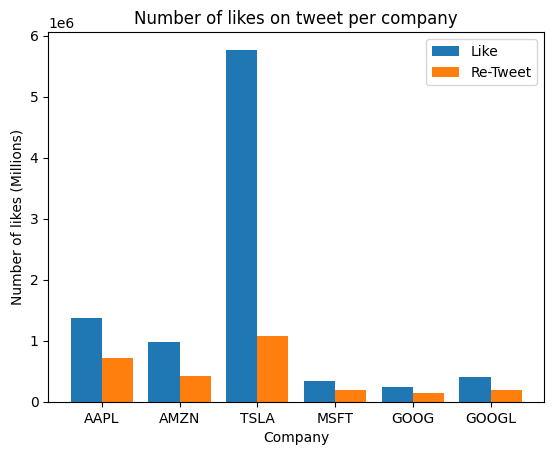

In [59]:
X_axis = np.arange(len(companies))
plt.bar(X_axis-0.2 ,company_tweet_likes,0.4, label = 'Like')
plt.bar(X_axis+0.2 ,company_tweet_retweet,0.4, label = 'Re-Tweet')

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])


plt.xticks(X_axis, companies)
plt.legend()
plt.title('Number of likes on tweet per company')
plt.xlabel('Company')

plt.ylabel('Number of likes (Millions)')

In [60]:
result = result.drop('writer', axis=1)


In [61]:
result.head()

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01 00:00:57
1,550441672312512512,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01 00:01:36
2,550441732014223360,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01 00:01:50
3,550442977802207232,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01 00:06:47
4,550443807834402816,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01 00:10:05


In [65]:
unique_days = result['date'].unique()
print(len(unique_days))

1826


In [66]:
# data = {'date': [0],'AAPL': 0,'AMZN': 0 ,'TSLA': 0,'MSFT': 0,'GOOG': 0,'GOOGL': 0}
# df= pd.DataFrame(data)
# df.head()

In [67]:
# date = result.loc[0]['date']
# print(date)
# for date in days[0:1826]:
#     AAPL = ((result.loc[(result['ticker_symbol'] == 'AAPL' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'AAPL' )& (result['date'] == date)])))
#     AMZN = ((result.loc[(result['ticker_symbol'] == 'AMZN' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'AMZN' )& (result['date'] == date)])))
#     TSLA = ((result.loc[(result['ticker_symbol'] == 'TSLA' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'TSLA' )& (result['date'] == date)])))
#     MSFT = ((result.loc[(result['ticker_symbol'] == 'MSFT' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'MSFT' )& (result['date'] == date)])))
#     GOOG = ((result.loc[(result['ticker_symbol'] == 'GOOG' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'GOOG' )& (result['date'] == date)])))
#     GOOGL = ((result.loc[(result['ticker_symbol'] == 'GOOGL' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'GOOGL' )& (result['date'] == date)])))
#     data = {'date': [date],'AAPL': AAPL,'AMZN': AMZN ,'TSLA': TSLA,'MSFT': MSFT,'GOOG': GOOG,'GOOGL': GOOGL}
#     df = df.append(data, ignore_index=True)

In [68]:
# df.to_csv('reaction.csv', index=False)

In [70]:
reaction.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"[datetime.date(2015, 1, 1)]",0.257525,-0.145038,0.171717,0.277778,0.383333,0.444444
2,"[datetime.date(2015, 1, 2)]",0.163783,0.241379,0.268657,0.317757,0.344828,0.288288
3,"[datetime.date(2015, 1, 3)]",0.416185,0.298507,0.145833,0.271186,0.658228,0.807143
4,"[datetime.date(2015, 1, 4)]",0.389163,0.223529,0.210526,0.411765,0.495283,0.857143


In [71]:
reaction = reaction.drop(0)

In [72]:
reaction.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1,"[datetime.date(2015, 1, 1)]",0.257525,-0.145038,0.171717,0.277778,0.383333,0.444444
2,"[datetime.date(2015, 1, 2)]",0.163783,0.241379,0.268657,0.317757,0.344828,0.288288
3,"[datetime.date(2015, 1, 3)]",0.416185,0.298507,0.145833,0.271186,0.658228,0.807143
4,"[datetime.date(2015, 1, 4)]",0.389163,0.223529,0.210526,0.411765,0.495283,0.857143
5,"[datetime.date(2015, 1, 5)]",0.223191,0.323843,0.287770,0.151786,0.404682,0.610390


In [73]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 1 to 1826
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1826 non-null   object 
 1   AAPL    1823 non-null   float64
 2   AMZN    1826 non-null   float64
 3   TSLA    1826 non-null   float64
 4   MSFT    1826 non-null   float64
 5   GOOG    1825 non-null   float64
 6   GOOGL   1826 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


In [74]:
stocks = pd.read_csv('stocks.csv')

In [75]:
stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2010-06-01,123.2400,3650661,124.9700,126.5720,123.0200
1,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943
2,GOOGL,2010-06-01,243.6667,2664303,242.6868,248.0565,242.5302
3,MSFT,2010-06-01,25.8900,76120800,25.5300,26.3100,25.5200
4,GOOGL,2010-06-02,249.2233,2513109,245.8439,249.4759,243.2071


In [76]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB


In [79]:
print(stocks.shape)

(17528, 7)
